In [2]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"C:\Users\comp\Documents\Retail_Customer_Seg\data\online_retail_II.xlsx")

In [4]:
#Inspect data structure
print("Data Shape:", data.shape)
print("Column Names:", data.columns)
print("Data Types:")
print(data.dtypes)
print("\nFirst 5 rows:")


Data Shape: (525461, 8)
Column Names: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Data Types:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

First 5 rows:


In [5]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316  


In [7]:
# Count unique values in key columns
print("\nUnique Customer IDs:", data['Customer ID'].nunique())
print("Unique Countries:", data['Country'].nunique())
print("Unique Stock Codes (products):", data['StockCode'].nunique())


Unique Customer IDs: 4383
Unique Countries: 40
Unique Stock Codes (products): 4632


In [8]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [9]:
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 6865


In [10]:
# Outlier Detection
print("\nNegative or zero Quantity count:", data[data['Quantity'] <= 0].shape[0])
print("Negative or zero Price count:", data[data['Price'] <= 0].shape[0])


Negative or zero Quantity count: 12326
Negative or zero Price count: 3690


In [11]:
# InvoiceDate range
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print("\nInvoiceDate range:")
print("Earliest:", data['InvoiceDate'].min())
print("Latest:", data['InvoiceDate'].max())



InvoiceDate range:
Earliest: 2009-12-01 07:45:00
Latest: 2010-12-09 20:01:00


In [12]:
print("Quantity stats:")
print(data['Quantity'].describe())
print("\nPrice stats:")
print(data['Price'].describe())

Quantity stats:
count    525461.000000
mean         10.337667
std         107.424110
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

Price stats:
count    525461.000000
mean          4.688834
std         146.126914
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64


VISUALIZATIONS

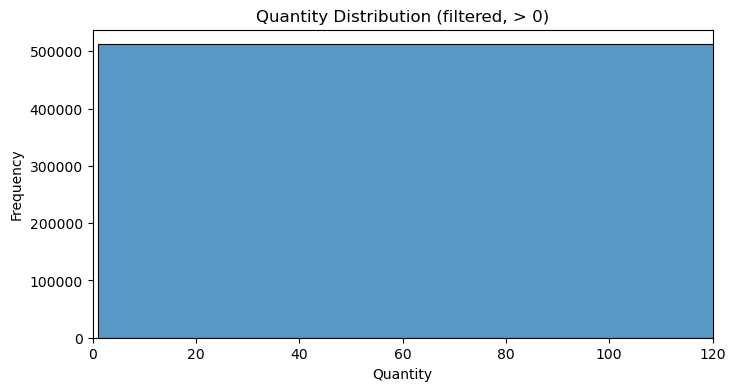

In [13]:
# Quantity
plt.figure(figsize=(8,4))
sns.histplot(data[data['Quantity'] > 0]['Quantity'], bins=50, kde=False)
plt.title('Quantity Distribution (filtered, > 0)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, data['Quantity'].quantile(0.99))
plt.show()

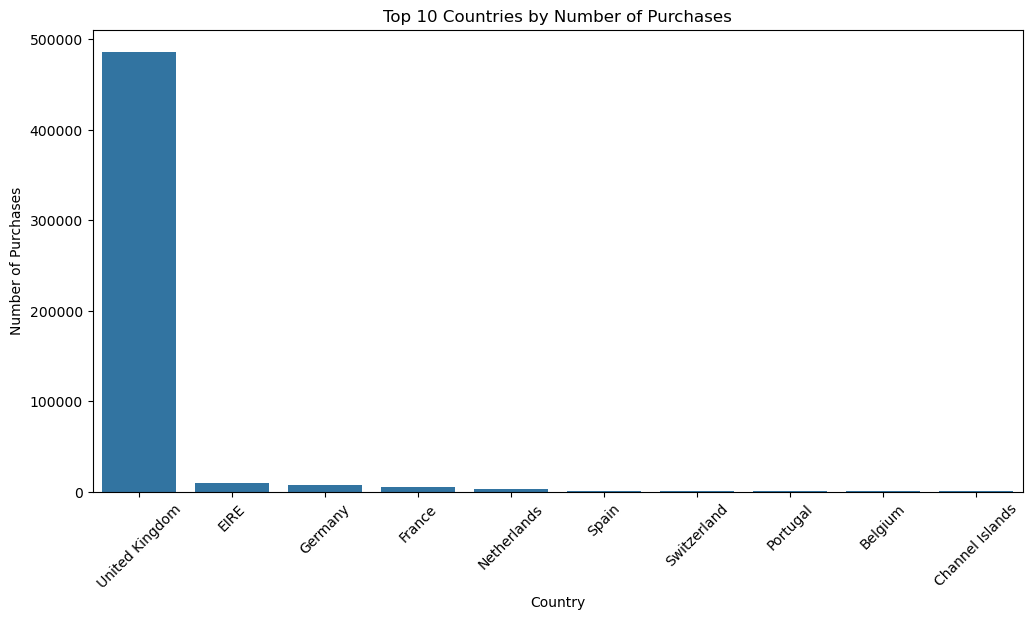

In [14]:
# Number of purchases per country
plt.figure(figsize=(12,6))
top_countries = data['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Purchases')
plt.xlabel('Country')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

C:\Users\comp\AppData\Local\Temp\ipykernel_9492\2208460840.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('InvoiceDate').resample('M').size().plot()


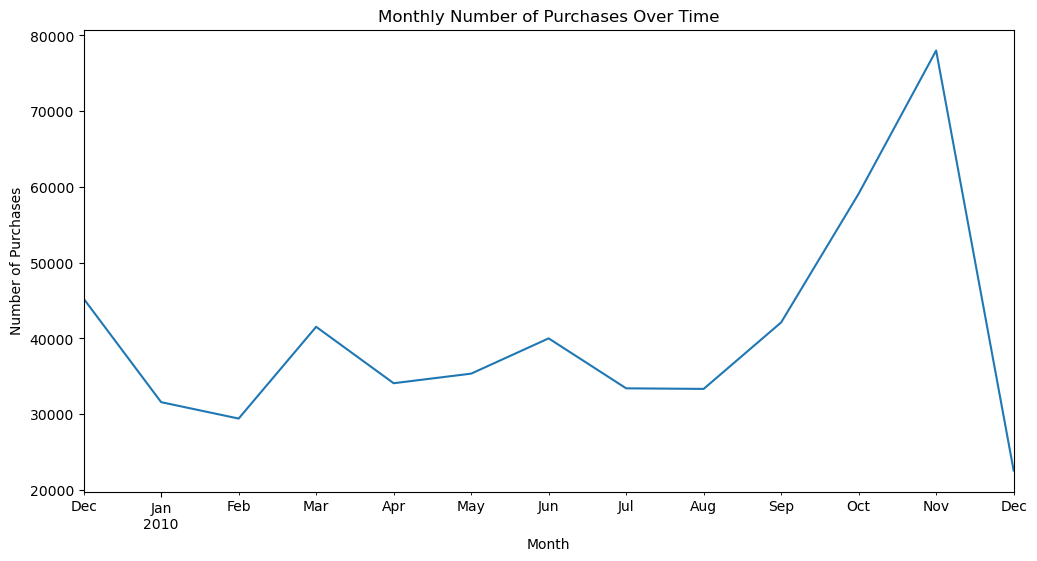

In [15]:
# Purchases over time
plt.figure(figsize=(12,6))
data.set_index('InvoiceDate').resample('M').size().plot()
plt.title('Monthly Number of Purchases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.show()

DATA CLEANING AND PREPROCESSING

In [ ]:
#Drop rows with missing Customer ID 
data_cleaned = data.dropna(subset=['Customer ID'])

In [18]:
#Remove duplicates (rows identical across all columns)
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
#Filter out rows with Quantity <= 0 (returns or errors)
data_cleaned = data_cleaned[data_cleaned['Quantity'] > 0]

In [21]:
# Filter out rows with Price <= 0 (invalid/erroneous data)
data_cleaned = data_cleaned[data_cleaned['Price'] > 0]


In [22]:
# Convert data types if necessary
data_cleaned['Customer ID'] = data_cleaned['Customer ID'].astype(str)  # Ensuring Customer ID is string
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


In [23]:
print("Cleaned data shape:", data_cleaned.shape)
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())
print("\nDuplicates after cleaning:", data_cleaned.duplicated().sum())


Cleaned data shape: (400916, 8)

Missing values after cleaning:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Duplicates after cleaning: 0


In [25]:
print("\nSample cleaned data:")
(data_cleaned.head())


Sample cleaned data:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


FEATURE ENGINEERING

For each Customer ID, calculate:
Recency = difference in days between reference date and last purchase date per customer

Frequency = count of unique invoices or purchases per customer

Monetary = sum of (Quantity × Price) for each customer

In [27]:
import datetime as dt

reference_date = data_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)
print("Reference Date for Recency:", reference_date)


Reference Date for Recency: 2010-12-10 20:01:00


In [29]:
# Calculate RFM metrics for each customer
rfm = data_cleaned.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'Price': lambda x: (data_cleaned.loc[x.index, 'Quantity'] * x).sum()  # Monetsry
})

In [30]:
# Rename columns for clarity
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Price': 'Monetary'
}, inplace=True)

In [31]:
# Display first few rows of RFM table
print("\nRFM Table sample:")
rfm.head()



RFM Table sample:


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,11,372.86
12347.0,3,2,1323.32
12348.0,74,1,222.16
12349.0,43,3,2671.14
12351.0,11,1,300.93


EXPLORATORY DATA ANALYSIS OF RFM FEATURES


In [32]:
# Summary statistics of RFM
print("RFM Summary Statistics:")
print(rfm.describe())

RFM Summary Statistics:
           Recency    Frequency       Monetary
count  4312.000000  4312.000000    4312.000000
mean     91.171846     4.455705    2040.406712
std      96.860633     8.170213    8911.755977
min       1.000000     1.000000       2.950000
25%      18.000000     1.000000     307.187500
50%      53.000000     2.000000     701.615000
75%     136.000000     5.000000    1714.932500
max     374.000000   205.000000  349164.350000


Text(0.5, 0, 'Days Since Last Purchase')

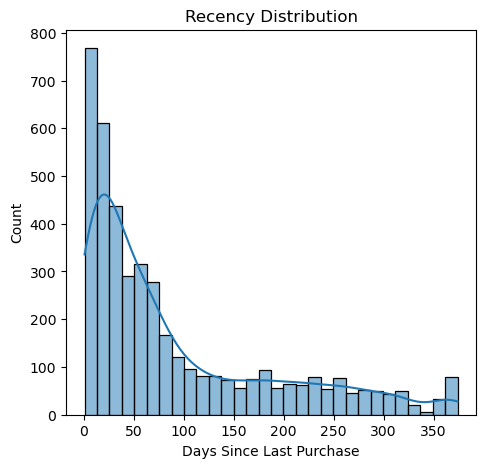

In [34]:
# Distribution plots for Recency

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

The Recency distribution is heavily right-skewed, showing most customers made purchases recently while fewer have been inactive for longer periods

Text(0.5, 0, 'Number of Purchases')

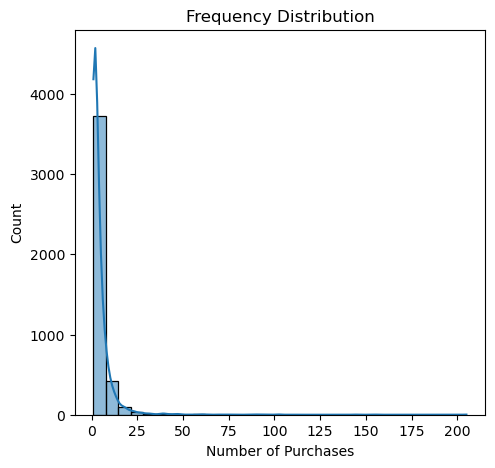

In [49]:
# Fequency
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')



The Frequency distribution is strongly right-skewed, indicating most customers make only a few purchases while loyal customers are far fewer

Text(0.5, 0, 'Total Spend')

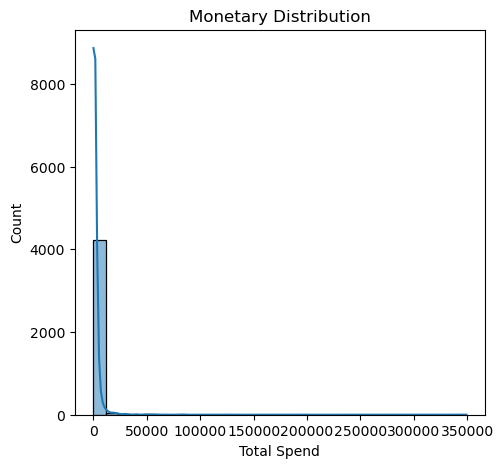

In [47]:
# Monetary
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')



In [64]:
import numpy as np

rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])   # log(1+x) transformation
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])


Text(0.5, 0, 'Days Since Last Purchase')

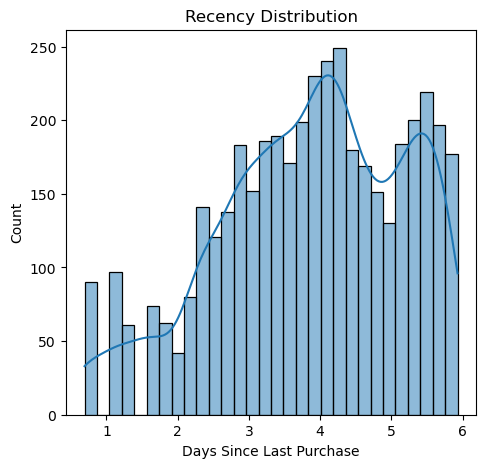

In [65]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_log['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

Text(0.5, 0, 'Number of Purchases')

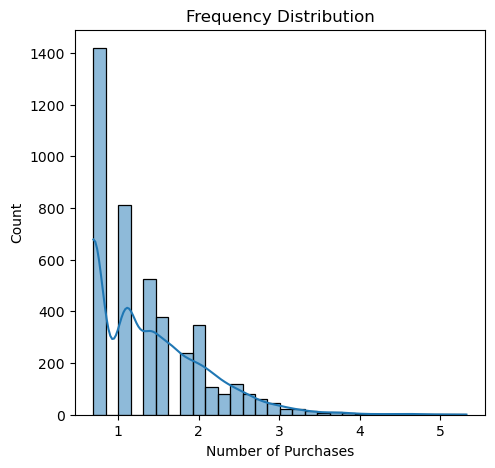

In [67]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 2)
sns.histplot(rfm_log['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

The Monetary distribution is highly right-skewed, showing that most customers spend little, while a small group contributes the majority of total revenue

Text(0.5, 0, 'Total Spend')

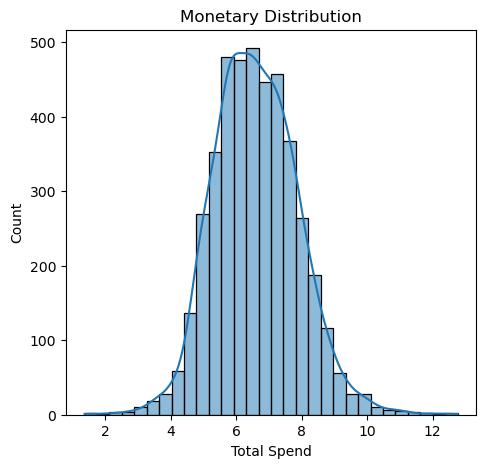

In [69]:
# Monetary
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 3)
sns.histplot(rfm_log['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')


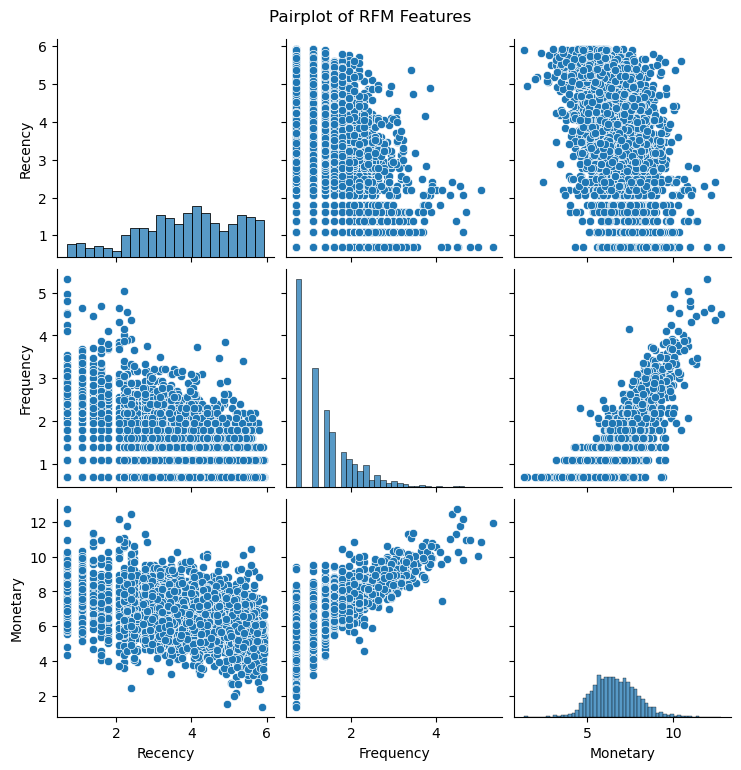

In [70]:
# Pairplot to check relationships among features
sns.pairplot(rfm_log)
plt.suptitle('Pairplot of RFM Features', y=1.02)
plt.show()

The pairplot shows that customers with recent purchases tend to buy more frequently and spend more, while high frequency is often linked to higher monetary value

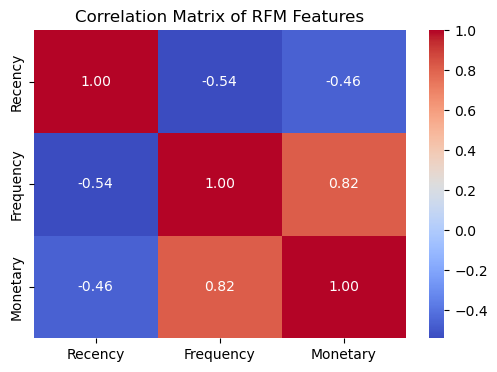

In [71]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(rfm_log.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of RFM Features')
plt.show()

The correlation matrix shows Frequency and Monetary are strongly correlated, while Recency has a weak negative correlation with both.

FEATURE SCALING

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Scale the RFM features using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


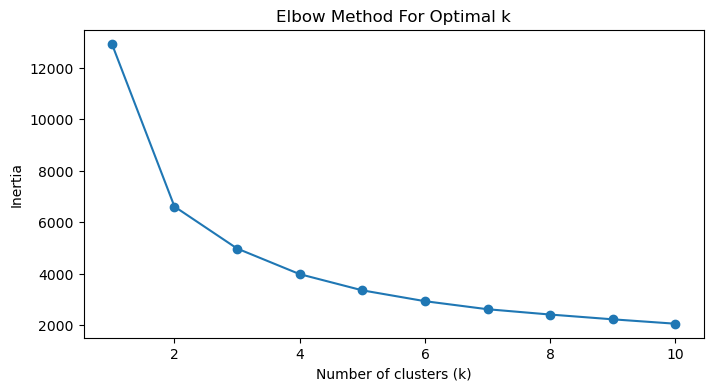

In [73]:
# Use Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


Using the elbow method and silhouette scores, we identified 4 as the optimal number of clusters, balancing compactness and separation. This segmentation allows targeted marketing strategies tailored to distinct customer purchase behaviors

In [74]:
# Calculate Silhouette scores for different k values
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    cluster_labels = km.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, cluster_labels))



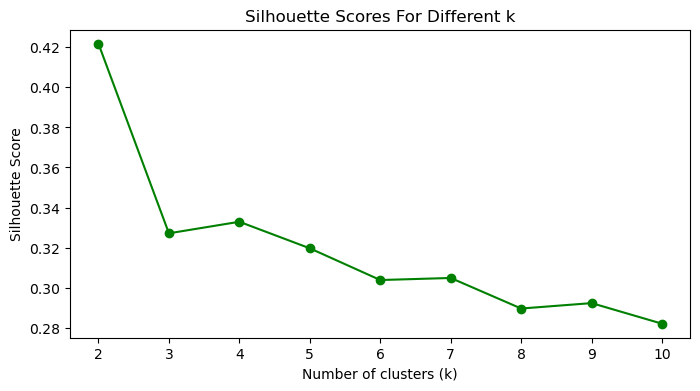

In [75]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores For Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The elbow plot shows a clear bend at k = 4, after which inertia decreases more gradually.

The silhouette score is highest at k = 2 (0.42), but drops sharply after that and stabilizes around k = 4 (0.34)

k=2 gives the highest silhouette score, it likely oversimplifies your segmentation and misses out on actionable subgroups.

k=4 is the recommended value, as it aligns with the elbow method, balances interpretability, and maintains reasonable silhouette separation.

In [76]:
# Fit KMeans with k=4 and assign clusters to customers
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)
rfm_log['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze cluster profiles by calculating mean RFM for each cluster
cluster_profiles = rfm_log.groupby('Cluster').mean().round(1)
print("Cluster Profiles (Mean RFM Values):")
print(cluster_profiles)

# Optionally, add count of customers per cluster
cluster_counts = rfm_log['Cluster'].value_counts().sort_index()
print("\nNumber of Customers per Cluster:")
print(cluster_counts)

Cluster Profiles (Mean RFM Values):
         Recency  Frequency  Monetary
Cluster                              
0            3.0        1.0       6.1
1            2.3        2.5       8.3
2            5.1        0.8       5.5
3            4.2        1.6       7.3

Number of Customers per Cluster:
Cluster
0     945
1     778
2    1378
3    1211
Name: count, dtype: int64


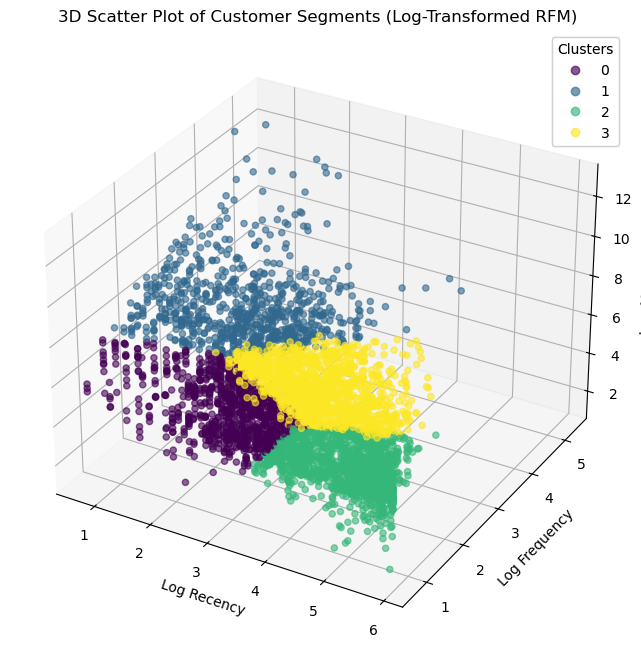

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm_log['Recency'], 
    rfm_log['Frequency'], 
    rfm_log['Monetary'], 
    c=rfm_log['Cluster'], 
    cmap='viridis', 
    alpha=0.6
)

ax.set_xlabel('Log Recency')
ax.set_ylabel('Log Frequency')
ax.set_zlabel('Log Monetary')
ax.set_title('3D Scatter Plot of Customer Segments (Log-Transformed RFM)')

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


Customers in Cluster 1 and 3 (blue and yellow) tend to have higher log Frequency and Monetary, indicating greater engagement and spending.

Cluster 2 customers (green) spread further along the log Recency axis, reflecting less recent purchases and lower engagement.

Cluster 0 (purple) occupies the lower end of all three axes, representing customers with low frequency, low monetary value, and longer recency.

In [83]:
cluster_labels = {
    0: 'Low Engagement',
    1: 'High Engagement',
    2: 'At-Risk',
    3: 'Medium Engagement'
}

rfm_log['Segment'] = rfm_log['Cluster'].map(cluster_labels)


SUMMARY REPORT FOR 

In [84]:
segment_summary = rfm_log.groupby('Segment').agg({
    'Recency': ['mean', 'count'],
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print(segment_summary)


                  Recency       Frequency Monetary
                     mean count      mean     mean
Segment                                           
At-Risk              5.10  1378      0.81     5.47
High Engagement      2.27   778      2.45     8.28
Low Engagement       2.97   945      1.04     6.07
Medium Engagement    4.15  1211      1.58     7.25


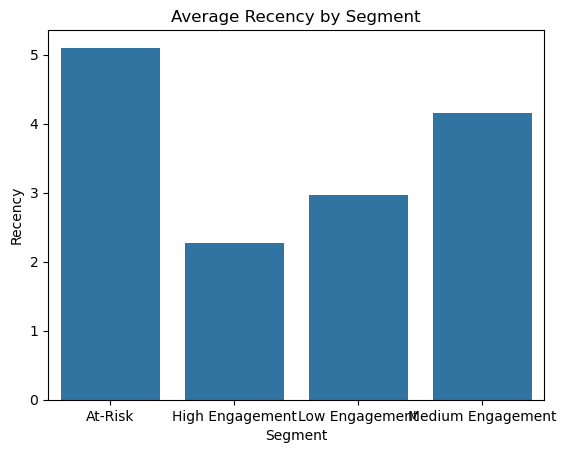

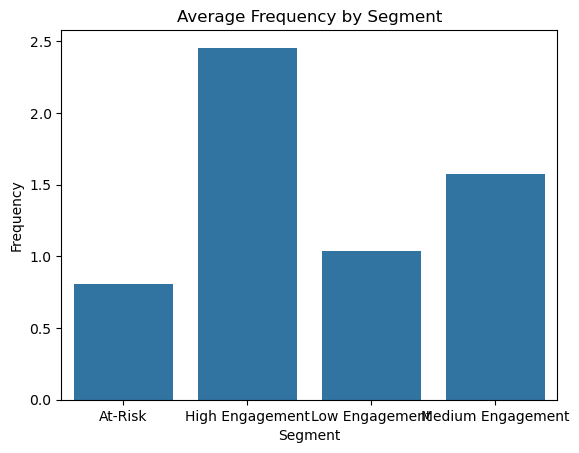

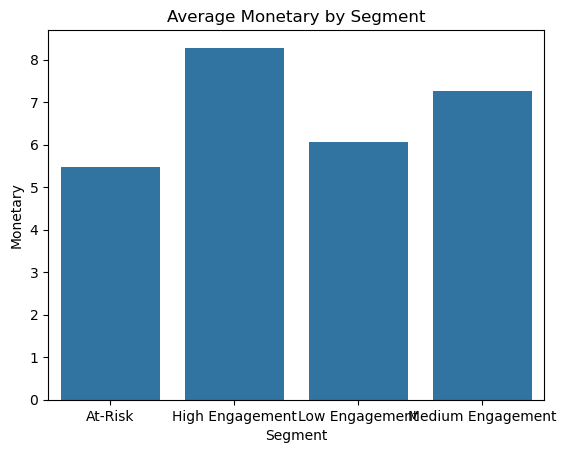

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_df = rfm_log.groupby('Segment', as_index=False).mean()
features = ['Recency', 'Frequency', 'Monetary']

for feat in features:
    sns.barplot(x='Segment', y=feat, data=avg_df)
    plt.title(f'Average {feat} by Segment')
    plt.show()
